In [272]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Prepairing toy dataset 

In [275]:
x1 = np.random.randint(90,110,10)+np.random.rand(10)
y1 = np.random.randint(90,110,10)+np.random.rand(10)

x2 = np.random.randint(0,20,10)+np.random.randn(10)
y2 = np.random.randint(0,20,10)+np.random.randn(10)

x3 = np.random.randint(40,60,10)+np.random.randn(10)
y3 = np.random.randint(40,60,10)+np.random.randn(10)

x4 = np.random.randint(0,20,10)+np.random.randn(10)
y4 = np.random.randint(90,110,10)+np.random.randn(10)

x5 = np.random.randint(90,110,10)+np.random.randn(10)
y5 = np.random.randint(0,20,10)+np.random.randn(10)

x = np.concatenate([x1,x2,x3, x4, x5], axis=0)
y = np.concatenate([y1,y2,y3,y4,y5], axis=0)

<AxesSubplot:>

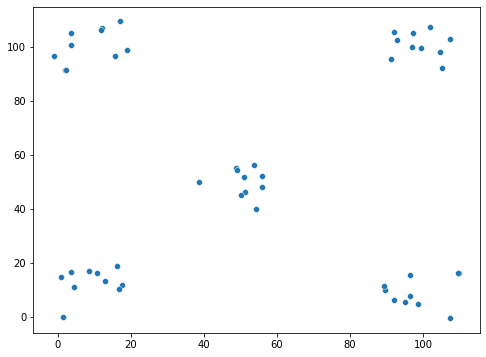

In [276]:
# To visiulize the toy dataset
plt.figure(figsize=(8,6))
sb.scatterplot(x=x,y=y)

# K-Means Clustering Algorithm

#### Step 1: Initialize the value of K  i.e. create 5  random centroids 

In [277]:
def k_centriod(k):
    centriods=[]
    for i in range(k):
        pt = [np.random.randint(0,100),np.random.randint(0,100)]
        centriods.append(pt)
    return np.array(centriods)


In [278]:
k=5
centriods = k_centriod(k)

<AxesSubplot:>

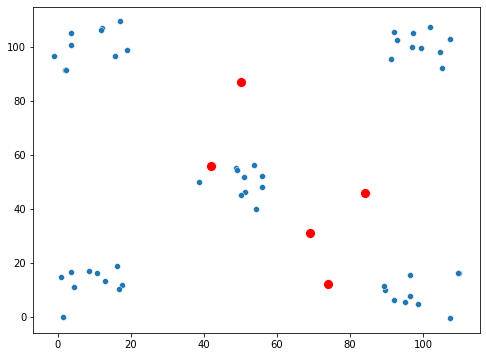

In [279]:
# To visiulize 
plt.figure(figsize=(8,6))
sb.scatterplot(x=x,y=y)
sb.scatterplot(x=centriods[:,0], y=centriods[:,1], s=100,c=["red"])

#### Step 2: calculate the distance of every datapoint to the centroids and assign the nearest centroid

In [280]:
def distance(x,y,c):
    
    grp=[]
    for i in range(len(x)):
        dists = []
        for j in c:
            dis = np.sqrt((x[i]-j[0])**2+(y[i]-j[1])**2)
            dists.append(dis)
        grp.append(dists.index(min(dists)))
    return np.array(grp)

In [281]:
grp = distance(x,y,centriods)


<AxesSubplot:>

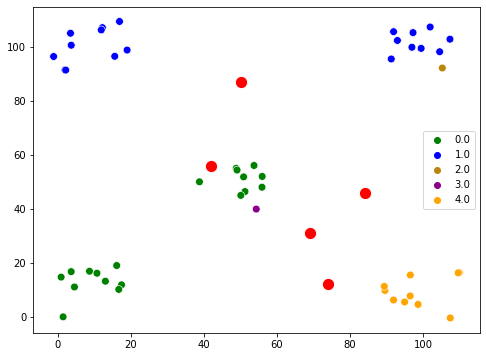

In [282]:
# To visiulize
p=x.reshape(-1,1)
q=y.reshape(-1,1)
r=grp.reshape(-1,1)
data = np.concatenate([p,q,r],axis=1)

plt.figure(figsize=(8,6))
sb.scatterplot(data=data,x=data[:,0],y=data[:,1],hue=data[:,2],palette=["green", "blue", "darkgoldenrod", "darkmagenta", "orange"], s=60)
sb.scatterplot(x=centriods[:,0], y=centriods[:,1], s=150,c=["red"], )

#### Step 3: calculate the mean every group and assign to the centroid to create new centroids


In [283]:
def cal_mean(x,y,grp):
    
    p=x.reshape(-1,1)
    q=y.reshape(-1,1)
    r=grp.reshape(-1,1)
    data = np.concatenate([p,q,r],axis=1)
    df = pd.DataFrame(data)
    mn = df.groupby(by=2).mean()
    
    return np.array(mn)
    
            

In [284]:
new_centriods = cal_mean(x,y,grp)

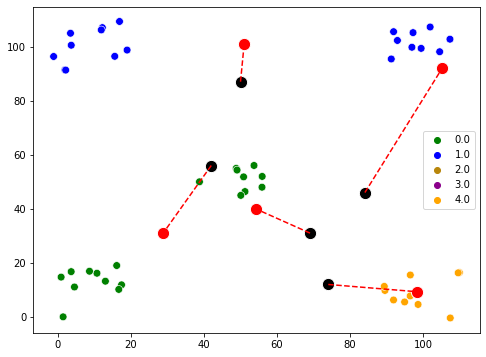

In [285]:
# To visiulize
p=x.reshape(-1,1)
q=y.reshape(-1,1)
r=grp.reshape(-1,1)
data = np.concatenate([p,q,r],axis=1)

plt.figure(figsize=(8,6))
sb.scatterplot(data=data,x=data[:,0],y=data[:,1],hue=data[:,2],palette=["green", "blue", "darkgoldenrod", "darkmagenta", "orange"], s=60)
#Old Centroids
sb.scatterplot(x=centriods[:,0], y=centriods[:,1], s=150,c=["black"])
#New Centroids
sb.scatterplot(x=new_centriods[:,0], y=new_centriods[:,1], s=150,c=["red"])

for i in range(len(centriods)):
    plt.plot([centriods[i][0], new_centriods[i][0]], [centriods[i][1], new_centriods[i][1]], "r--")

#### Step 4: Now just repeat the 2nd and 3rd step untill centroid stop changing

In [286]:
new_c = []

while(True):
    grp = distance(x,y,centriods) # Step-2
    new_c = cal_mean(x,y,grp) # Step-3
    eq = new_c==centriods
    if eq.all():
        break
    else:
        centriods=new_c

<AxesSubplot:>

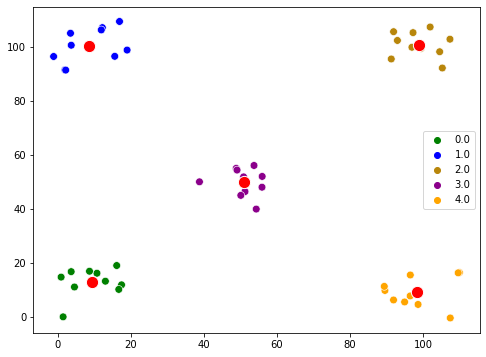

In [287]:
# To visiulize
p=x.reshape(-1,1)
q=y.reshape(-1,1)
r=grp.reshape(-1,1)
data = np.concatenate([p,q,r],axis=1)

plt.figure(figsize=(8,6))
sb.scatterplot(data=data,x=data[:,0],y=data[:,1],hue=data[:,2],palette=["green", "blue", "darkgoldenrod", "darkmagenta", "orange"], s=60)
#Old Centroids
sb.scatterplot(x=centriods[:,0], y=centriods[:,1], s=150,c=["red"])

In [288]:
df = pd.DataFrame(data, columns=['X','Y',"clusters"])
df

,X,Y,clusters
0,101.845084,107.228836,2.0
1,91.215319,95.403078,2.0
2,105.175288,92.065619,2.0
3,92.896128,102.256846,2.0
4,104.450780,98.085280,2.0
5,91.848928,105.498944,2.0
6,97.169876,105.151244,2.0
7,99.383644,99.329475,2.0
8,107.263892,102.722982,2.0
9,96.863862,99.738975,2.0
